In [1]:
################---------------------TERM PROJECT---------------------------------############

############--------------------Team 9 - AIT 590-001------------------------------############
###########------------Asmita Singh, Amrita Jose, Prateek Chitpur-----------------############

##########-----------SENTIMENT ANALYSIS ON AMAZON FINE FOOD REVIEWS---------------############

In [2]:
#Importing all packages required for the project
import pandas as pd
import numpy as np
import matplotlib
import nltk
import re
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from prettytable import PrettyTable
from textblob import TextBlob
from heapq import nlargest
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the Amazon Fine Food Reviews dataset
df = pd.read_csv('Reviews.csv', header='infer')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
#Checking the dimensions of the dataset
df.shape

(568454, 10)

In [6]:
#Summary of the dataframe
df.info(verbose=True, null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Id                      int64 
 1   ProductId               object
 2   UserId                  object
 3   ProfileName             object
 4   HelpfulnessNumerator    int64 
 5   HelpfulnessDenominator  int64 
 6   Score                   int64 
 7   Time                    int64 
 8   Summary                 object
 9   Text                    object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
#Data Preprocessing

#Identifying total count of missing values in the columns
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
#Imputing missing values/null values with black spaces
df.ProfileName.fillna("", inplace = True)
df.Summary.fillna("", inplace = True)

In [9]:
col = df[['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']]
col

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [10]:
#Identifying duplicate rows in the dataframe
dup = col[col.duplicated()]
print("Duplicate Rows:")
dup

Duplicate Rows:


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
6517,B005O8BLLU,APH7I7OZ8WUJP,J. Simpson,0,0,5,1347494400,Great first food,This is excellent for a baby's first taste. Th...
8523,B003VXFK44,A10H24TDLK2VDP,William Jens Jensen,0,0,3,1309824000,Unremarkable,"First, let me say that I prefer extra-bold K-C..."
9232,B006N3IG4K,A10H24TDLK2VDP,William Jens Jensen,0,0,3,1309824000,Unremarkable,"First, let me say that I prefer extra-bold K-C..."
15528,B000255OIG,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,5,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
19705,B0030VBRIU,A2MF0C4E7GYCI,"VW ""VW""",0,0,5,1305331200,My son loves this,My son loves this food. He is 16 months now a...
...,...,...,...,...,...,...,...,...,...
539218,B001BDDT8K,A3FKGKUCI3DG9U,Paul Moskowitz,0,0,3,1229472000,"If it looks good, is it good for the cats?",My two traditional striped cats eat mostly dry...
539359,B001BDDT8K,AF3BYMPWKWO8F,Joe MacBu,3,3,1,1243555200,Warning: Contains Menadione,"According to the manufacturer's website, this ..."
541565,B00014JYNO,AM820RV0VN0U,windie809,0,0,5,1339459200,love these protein bars!,if you are looking for a protein bar that does...
546112,B003YSV5ZY,A2GSNN6EH9K2HD,A. Meyer,0,0,5,1301875200,Very Tasty,These cereal bars are fantastic. All of their ...


In [11]:
newdf = df[['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']]

In [12]:
#Dropping duplicate rows as part of data preprocessing
newdf = newdf.drop_duplicates()

In [13]:
#Dimensions of the cleaned and preprocessed data frame
newdf.shape

(568173, 9)

Text(0.5, 1.0, 'Score')

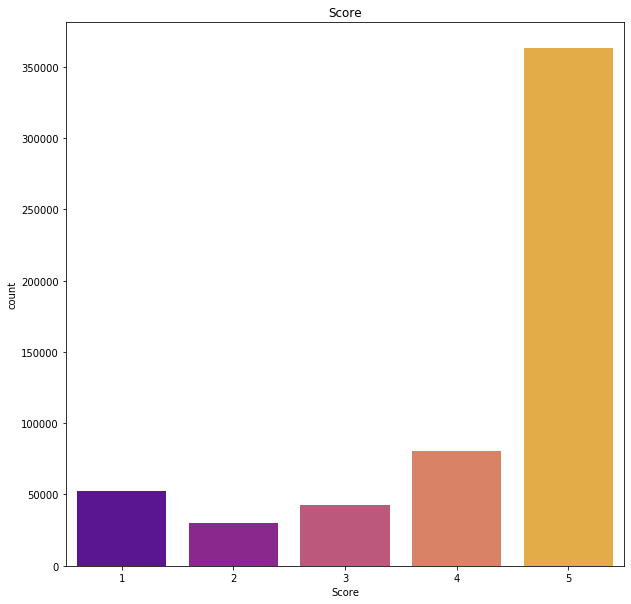

In [14]:
#Exploratory Analysis  

#Plotting the score ratings in the dataset
sns.countplot(newdf['Score'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Score')

In [15]:
newdf = newdf[['ProductId','Score','Text']]
newdf.Score.value_counts()

#It can be observed that the distribution of the data is significantly skewed with a major proportion of reviews with 
#5 ratings as compared to reviews with other ratings. 

5    362936
4     80627
1     52231
3     42614
2     29765
Name: Score, dtype: int64

In [16]:
#Rating of 3 is considered as neutral and does not serve as a useful indictor to determine sentiment due to which 
#it is not included in the dataframe. 
newdf = newdf[newdf.Score != 3]
#Function to implement a column 'Sentiment' that will have value 1(Positive Sentiment) if ratings are 4 and 5 (>3)
#and will have value 0(Negative Sentiment) if ratings are 1 and 2(<3)
def f(r):
    if r > 3:
        return 1
    else:
        return 0
newdf['Sentiment'] = newdf.Score.map(f) 
newdf.head()

,ProductId,Score,Text,Sentiment
0,B001E4KFG0,5,I have bought several of the Vitality canned d...,1
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,B000LQOCH0,4,This is a confection that has been around a fe...,1
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...,0
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...,1


In [17]:
newdf['Sentiment'] = newdf.Score.map(f)
#Counting the positive and negative sentiment values
newdf.Sentiment.value_counts()

1    443563
0     81996
Name: Sentiment, dtype: int64

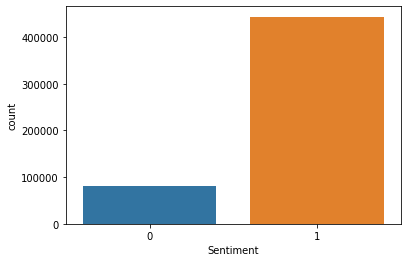

In [18]:
#Plotting the sentiment field
sns.countplot(newdf['Sentiment'])
plt.show()
#From the plot, it could be observed that Amazon dataset is considerably imbalanced. 84% of the reviews are 
#marked as Sentiment 1 (for score = 4 and score = 5) that could lead to misclassification of training data. 

In [19]:
#Identifying the positive and negative sentiment groups in the dataframe 
newdf1 = newdf.groupby('Sentiment')

for i,j in newdf1:
    print(i)
    
    print(type(j))
    if i==0:
        newdf_minor = j
    if i==1:
        newdf_major = j

newdf_major.head()

0
<class 'pandas.core.frame.DataFrame'>
1
<class 'pandas.core.frame.DataFrame'>


,ProductId,Score,Text,Sentiment
0,B001E4KFG0,5,I have bought several of the Vitality canned d...,1
2,B000LQOCH0,4,This is a confection that has been around a fe...,1
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...,1
5,B006K2ZZ7K,4,I got a wild hair for taffy and ordered this f...,1
6,B006K2ZZ7K,5,This saltwater taffy had great flavors and was...,1


In [20]:
#Performing random under sampling in a 50/50 ratio to balance class distribution by randomly eliminating 
#majority class examples. 

newdf_major_undersampled = resample(newdf_major,replace=False,n_samples=81996,random_state=123)

In [21]:
#Countings the positive and negative reviews in the new balanced dataframe. 
newdf_balanced = pd.concat([newdf_minor,newdf_major_undersampled])
newdf_balanced.Sentiment.value_counts()

1    81996
0    81996
Name: Sentiment, dtype: int64

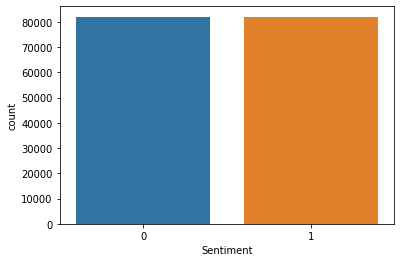

In [22]:
#Plotting the data distribution of sentiment 
sns.countplot(newdf_balanced['Sentiment'])
plt.show()

#It could be observed from the counts and distribution that the sentiment is evenly distributed in the dataset now. 

In [23]:
newdf_balanced.head()

,ProductId,Score,Text,Sentiment
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...,0
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...,0
12,B0009XLVG0,1,My cats have been happily eating Felidae Plati...,0
16,B001GVISJM,2,I love eating them and they are good for watch...,0
26,B001GVISJM,1,"The candy is just red , No flavor . Just plan...",0


In [24]:
#Function to clean up the text reviews in the data 
clean_reviews = re.compile('[^a-z]+')

def convert_sent(word_list):
    string = " "   
    return (string.join(word_list)) 

#Function cleaning includes converting to lower case, removing tags, punctuations and stop words. 
def cleaner(sent):
    sent = sent.lower()
    sent = clean_reviews.sub(' ', sent).strip()
    clean_tag = re.compile('<.*?>')
    # HTML tags are removed
    sent = re.sub(clean_tag, ' ', sent)        
    sent = re.sub(r'[?|!|\'|"|#]',r'',sent)
    #Removing stop words in the rtext reviews  
    stop_words = set(stopwords.words('english'))
    #Tokenizing the reviews
    word_tokens = word_tokenize(sent) 
    filtered_word_list = []
    for word in word_tokens: 
        if word not in stop_words: 
            filtered_word_list.append(word)
    return convert_sent(filtered_word_list)
#Creating a new column called 'Text_Clean' to store the cleaned and preprocessed text reviews. 
newdf_balanced["Text_Clean"] = newdf_balanced["Text"].apply(cleaner)
newdf_balanced.head()

,ProductId,Score,Text,Sentiment,Text_Clean
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanuts p...
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
12,B0009XLVG0,1,My cats have been happily eating Felidae Plati...,0,cats happily eating felidae platinum two years...
16,B001GVISJM,2,I love eating them and they are good for watch...,0,love eating good watching tv looking movies sw...
26,B001GVISJM,1,"The candy is just red , No flavor . Just plan...",0,candy red flavor plan chewy would never buy


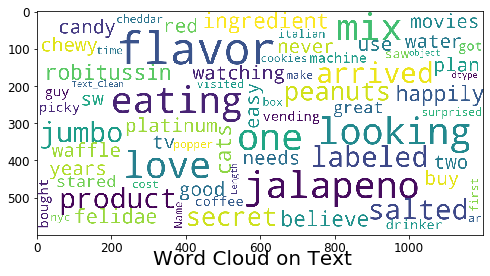

In [25]:
#Generating wordclouds for the data 
stopwords_s = set(STOPWORDS)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords_s,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

#Word Cloud for the cleaned user reviews
show_wordcloud(newdf_balanced["Text_Clean"], title = "Word Cloud on Text")

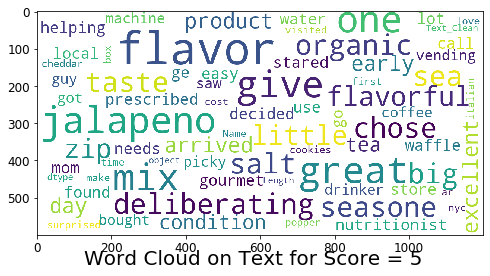

In [26]:
#Word Cloud for reviews with rating score of 5 (Best rated reviews)
show_wordcloud(newdf_balanced[newdf_balanced.Score == 5]["Text_Clean"], title = "Word Cloud on Text for Score = 5")

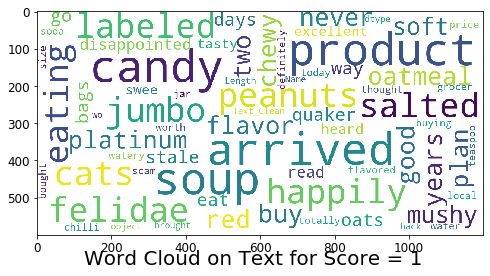

In [27]:
#Word Cloud for reviews with rating score of 1 (Worst rated reviews)
show_wordcloud(newdf_balanced[newdf_balanced.Score == 1]["Text_Clean"], title = "Word Cloud on Text for Score = 1")

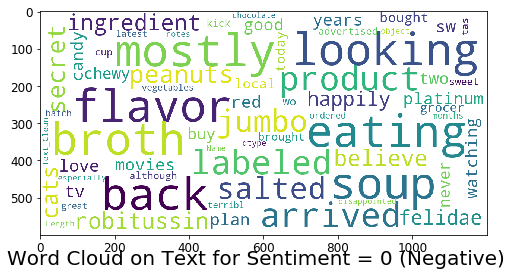

In [28]:
#Word Cloud for reviews with sentiment score of 0 (Negative reviews)
show_wordcloud(newdf_balanced[newdf_balanced.Sentiment == 0]["Text_Clean"], title = "Word Cloud on Text for Sentiment = 0 (Negative)")

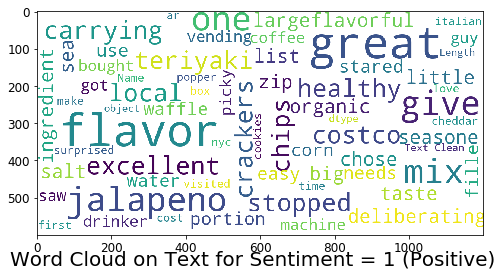

In [29]:
#Word Cloud for reviews with sentiment score of 1 (Positive reviews)
show_wordcloud(newdf_balanced[newdf_balanced.Sentiment == 1]["Text_Clean"], title = "Word Cloud on Text for Sentiment = 1 (Positive)")

In [30]:
#Polarity and Subjectivity analysis 

#Computing and analysing polarity and subjectivity scores of the reviews
text_data = newdf_balanced['Text_Clean']
#Counters for positive, negative and neutral polarised reviews
positive_counter = 0
negative_counter = 0
neutral_count = 0
#Counters for objective, subjective and averagely subjective reviews
objective_count = 0
subjective_count = 0
average_subjective = 0
for index, value in text_data.items():
    testimonial = TextBlob(value)
    
    if testimonial.sentiment.polarity > 0:
        #Counting positive polarities
        positive_counter += 1
    elif testimonial.sentiment.polarity < 0:
        #Counting negative polarities
        negative_counter +=1
    else:
        #Counting neutral reviews
        neutral_count +=1
    
    if testimonial.sentiment.subjectivity <0.5:
        #Counting objective reviews
        objective_count +=1
    elif testimonial.sentiment.subjectivity >0.5:
        #Counting subjective reviews
        subjective_count +=1
    else:
        #Counting moderately subjective reviews
        average_subjective +=1
    
print("Positively polarised reviews: ", positive_counter)
print("Negatively polarised reviews: ", negative_counter)
print("Neutrally polarised reviews: ", neutral_count)
print("Objective reviews: ", objective_count)
print("Subjective reviews reviews: ", subjective_count)
print("Moderately Subjective reviews: ", average_subjective)

Positively polarised reviews:  126018
Negatively polarised reviews:  33560
Neutrally polarised reviews:  4414
Objective reviews:  62020
Subjective reviews reviews:  98913
Moderately Subjective reviews:  3059


In [31]:
#Sentiment Analysis can be done by predicting the sentiment of the text using various models.
#In this project, sentiment analysis will be performed using three models - Logistic regression, Naive Bayes and K 
#Nearest Neighbor(KNN). 
#For each of the models, the data will be subjected to two vectorizations techniques - Bag of Words 
#and TF IDF to determine which would give the best performance.

In [32]:
#Logistic Regression using Bag of Words 

#Splitting the balanced data into train and test datasets for predicting sentiment of text
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(newdf_balanced['Text_Clean'], newdf_balanced['Sentiment'], random_state = 0)

#Vectorization using bag of words
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_traindata)
X_train_vectorized = vect.transform(X_traindata)

#Calling the logic regression model implementation function
model = LogisticRegression()
model.fit(X_train_vectorized, y_traindata)

#Predicting on test data
predictions = model.predict(vect.transform(X_testdata))

#AUC score for Logistic Regression using Bag of Words
log1_auc = roc_auc_score(y_testdata, predictions)
print('AUC for Logistic Regression using Bag of Words: ', log1_auc)  

#Confusion Matrix of the model
cf_matrixLR = confusion_matrix(y_testdata, predictions)
print('Confusion Matrix for the model\n')
print(cf_matrixLR)

#Precision, Recall and F1 Score of the model
print(classification_report(y_testdata, predictions))

#F1 Score of the model
log1_f1=f1_score(y_testdata, predictions, average='weighted')
print(log1_f1)

AUC for Logistic Regression using Bag of Words:  0.9270537258490439
Confusion Matrix for the model

[[18788  1463]
 [ 1528 19219]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     20251
           1       0.93      0.93      0.93     20747

    accuracy                           0.93     40998
   macro avg       0.93      0.93      0.93     40998
weighted avg       0.93      0.93      0.93     40998

0.9270464378117974


In [33]:
#Logistic Regression using TF-IDF

#Splitting the balanced data into train and test datasets for predicting sentiment of text
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(newdf_balanced['Text_Clean'], newdf_balanced['Sentiment'], random_state = 0)

tfidf_vect = TfidfVectorizer(ngram_range=(1,2)) 
tfidf_train_vectorized = tfidf_vect.fit_transform(X_traindata)

#Calling the logic regression model implementation function
model = LogisticRegression()
model.fit(tfidf_train_vectorized, y_traindata)

#Predicting on test data
predictions = model.predict(tfidf_vect.transform(X_testdata))

#AUC score for Logistic Regression using TF-IDF
log2_auc = roc_auc_score(y_testdata, predictions)
print('AUC for Logistic Regression using TF-IDF: ', log2_auc)  

#Precision, Recall and F1 Score of the model
print(classification_report(y_testdata, predictions))

#F1 Score of the model
log2_f1=f1_score(y_testdata, predictions, average='weighted')
print(log2_f1)

AUC for Logistic Regression using TF-IDF:  0.9150785360980027
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     20251
           1       0.92      0.91      0.92     20747

    accuracy                           0.92     40998
   macro avg       0.92      0.92      0.92     40998
weighted avg       0.92      0.92      0.92     40998

0.9150473265852821


In [34]:
# K-Neighbors Classifier using Bag of Words
  
#Splitting the balanced data into train and test datasets for predicting sentiment of text
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(newdf_balanced['Text_Clean'], newdf_balanced['Sentiment'], random_state = 0)

#Vectorization using bag of words
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_traindata)
X_train_vectorized = vect.transform(X_traindata)

#Calling the K-Neighbors Classifier model implementation function
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_vectorized, y_traindata)

#Predicting on test data
predictions = KNN_model.predict(vect.transform(X_testdata))

#AUC score for K-Neighbors Classifier using Bag of Words
knn1_auc = roc_auc_score(y_testdata, predictions)
print('AUC for K-Neighbors Classifier using Bag of Words: ', knn1_auc) 

#Confusion Matrix of the model
cf_matrixKNN = confusion_matrix(y_testdata, predictions)
print('Confusion Matrix for the model\n')
print(cf_matrixKNN)

#Precision, Recall and F1 Score of the model
print(classification_report(y_testdata, predictions))

#F1 Score of the model
knn1_f1=f1_score(y_testdata, predictions, average='weighted')
print(knn1_f1)

AUC for K-Neighbors Classifier using Bag of Words:  0.719763447739878
Confusion Matrix for the model

[[12733  7518]
 [ 3926 16821]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69     20251
           1       0.69      0.81      0.75     20747

    accuracy                           0.72     40998
   macro avg       0.73      0.72      0.72     40998
weighted avg       0.73      0.72      0.72     40998

0.7184013630540727


In [35]:
# K-Neighbors Classifier using TF-IDF

#Splitting the balanced data into train and test datasets for predicting sentiment of text
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(newdf_balanced['Text_Clean'], newdf_balanced['Sentiment'], random_state = 0)

tfidf_vect = TfidfVectorizer(ngram_range=(1,2)) 
tfidf_train_vectorized = tfidf_vect.fit_transform(X_traindata)

#Calling the K-Neighbors Classifier model implementation function
KNN_model = KNeighborsClassifier()
KNN_model.fit(tfidf_train_vectorized, y_traindata)

#Predicting on test data
predictions = KNN_model.predict(tfidf_vect.transform(X_testdata))

#AUC score for K-Neighbors Classifier using TF-IDF
knn2_auc = roc_auc_score(y_testdata, predictions)
print('AUC for K-Neighbors Classifier using TF-IDF: ', knn2_auc)  

#Precision, Recall and F1 Score of the model
print(classification_report(y_testdata, predictions))

#F1 Score of the model
knn2_f1=f1_score(y_testdata, predictions, average='weighted')
print(knn2_f1)


AUC for K-Neighbors Classifier using TF-IDF:  0.7561277557723972
              precision    recall  f1-score   support

           0       0.80      0.67      0.73     20251
           1       0.73      0.84      0.78     20747

    accuracy                           0.76     40998
   macro avg       0.76      0.76      0.76     40998
weighted avg       0.76      0.76      0.76     40998

0.7553788964569014


In [36]:
# Naive Bayes using Bag of Words
  
#Splitting the balanced data into train and test datasets for predicting sentiment of text
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(newdf_balanced['Text_Clean'], newdf_balanced['Sentiment'], random_state = 0)

#Vectorization using bag of words
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_traindata)
X_train_vectorized = vect.transform(X_traindata)

#Calling the Naive Bayes model implementation function
MNB_model = MultinomialNB()
MNB_model.fit(X_train_vectorized, y_traindata)

#Predicting on test data
predictions = MNB_model.predict(vect.transform(X_testdata))

#AUC score for Naive Bayes using Bag of Words
mnb1_auc = roc_auc_score(y_testdata, predictions)
print('AUC for Naive Bayes using Bag of Words: ', mnb1_auc) 

#Confusion Matrix of the model
cf_matrixNB = confusion_matrix(y_testdata, predictions)
print('Confusion Matrix for the model\n')
print(cf_matrixNB)

#Precision, Recall and F1 Score of the model
print(classification_report(y_testdata, predictions))

#F1 Score of the model
mnb1_f1=f1_score(y_testdata, predictions, average='weighted')
print(mnb1_f1)


AUC for Naive Bayes using Bag of Words:  0.8900771233203372
Confusion Matrix for the model

[[16979  3272]
 [ 1209 19538]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     20251
           1       0.86      0.94      0.90     20747

    accuracy                           0.89     40998
   macro avg       0.90      0.89      0.89     40998
weighted avg       0.89      0.89      0.89     40998

0.8903573565214484


In [37]:
# Naive Bayes using TF-IDF

#Splitting the balanced data into train and test datasets for predicting sentiment of text
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(newdf_balanced['Text_Clean'], newdf_balanced['Sentiment'], random_state = 0)

tfidf_vect = TfidfVectorizer(ngram_range=(1,2)) 
tfidf_train_vectorized = tfidf_vect.fit_transform(X_traindata)

#Calling the Naive Bayes model implementation function
MNB_model = MultinomialNB()
MNB_model.fit(tfidf_train_vectorized, y_traindata)

#Predicting on test data
predictions = MNB_model.predict(tfidf_vect.transform(X_testdata))

#AUC score for K-Neighbors Classifier using TF-IDF
mnb2_auc = roc_auc_score(y_testdata, predictions)
print('AUC for Naive Bayes using TF-IDF: ', mnb2_auc)  

#Precision, Recall and F1 Score of the model
print(classification_report(y_testdata, predictions))

#F1 Score of the model
mnb2_f1=f1_score(y_testdata, predictions, average='weighted')
print(mnb2_f1)


AUC for Naive Bayes using TF-IDF:  0.9139306130389728
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     20251
           1       0.93      0.90      0.91     20747

    accuracy                           0.91     40998
   macro avg       0.91      0.91      0.91     40998
weighted avg       0.91      0.91      0.91     40998

0.913718681380323


In [38]:
#Comparing performance of all models generated using metrics AUC Score and F-Score

x = PrettyTable()
x.field_names = ["Model Name", "AUC Score","F-Score"]
x.add_row(["Logistic Regression - Bag of Words", log1_auc, log1_f1])
x.add_row(["Logistic Regression - TF-IDF", log2_auc, log2_f1])
x.add_row(["K-Neighbors Classifier - Bag of Words", knn1_auc, knn1_f1])
x.add_row(["K-Neighbors Classifier - TF-IDF", knn2_auc, knn2_f1])
x.add_row(["Naive Bayes - Bag of Words", mnb1_auc, mnb1_f1])
x.add_row(["Naive Bayes - TF-IDF", mnb2_auc, mnb2_f1])
print(x)

+---------------------------------------+--------------------+--------------------+
|               Model Name              |     AUC Score      |      F-Score       |
+---------------------------------------+--------------------+--------------------+
|   Logistic Regression - Bag of Words  | 0.9270537258490439 | 0.9270464378117974 |
|      Logistic Regression - TF-IDF     | 0.9150785360980027 | 0.9150473265852821 |
| K-Neighbors Classifier - Bag of Words | 0.719763447739878  | 0.7184013630540727 |
|    K-Neighbors Classifier - TF-IDF    | 0.7561277557723972 | 0.7553788964569014 |
|       Naive Bayes - Bag of Words      | 0.8900771233203372 | 0.8903573565214484 |
|          Naive Bayes - TF-IDF         | 0.9139306130389728 | 0.913718681380323  |
+---------------------------------------+--------------------+--------------------+


In [39]:
#Sampling the data for summarization
#Sampling is done because data size is huge and the total exceution time for summarization was 30mins. A sample of 2000
#rows is taken to generate summaries.

import pandas

df = pandas.DataFrame(pandas.np.random.random(100))

# Randomly sample 2000 elements from the dataframe
df_elements = newdf_balanced.sample(n=2000)
#Aggregating the data frame by Product Id and Sentiment to generate positive and negative summaries for each product 
aggregatedf = df_elements.groupby(['ProductId','Sentiment','Text_Clean'],as_index=False)['Score'].mean()
print(aggregatedf)
#Identifying count of unique products in the 2000 row sample data
n = len(pd.unique(aggregatedf['ProductId'])) 
print("Total number of unique products in the 2000 rows sample data:",n)


       ProductId  Sentiment  \
0     B00004CI84          1   
1     B00004CI84          1   
2     B00004S1C6          1   
3     B000084F04          0   
4     B000084F04          0   
...          ...        ...   
1994  B0098WV8F2          1   
1995  B0099HD3YA          0   
1996  B009E7YC54          1   
1997  B009EQQL5Y          0   
1998  B009RB4GO4          0   

                                             Text_Clean  Score  
0     movie top notch lot ways great family movie ma...      5  
1     tim burton best work well edward scissorhands ...      5  
2     pretty colors true labels one brands could fin...      5  
3     give cat litter star horrible overpowering amm...      1  
4     loved name loved concept tried several months ...      2  
...                                                 ...    ...  
1994  purchased product times newark natural foods s...      5  
1995  received nespresso capsels yet old ones anxiou...      1  
1996  stuff wonderful glad amazon carries 

In [40]:
#Sumarization is intended for customers who are not satisfied by just viewing the ratings but also do not 
#have enough time to read through an entire review. 
#The generated summary will give the gist of the review and enhance user experience. 

In [41]:
#Two summarization techniques will be used to generate summaries of user reviews. These include summarization using 
#NLTK and summarization using Ngrams(trigrams). Summarization of reviews is done on product level by aggregating the 
#data at the product level. Once the summaries are generated, the sentiment of the summary is captured using the 
#TextBlob polarity function to identify positive and negative reviews for a product. The summaries are also classified
#as Sentiment 0(negative sentiment) and Sentiment 1(positive sentiment) in order to compare them with the sentiment 
#captured from the original summary and determine the accuracy of the sentiment captured by summaries generated using 
#these two summarization techniques

In [42]:
#Summarization using NLTK 
#Field to store summaries generated using NLTK
aggregatedf['Summaries_Generated'] = ""
#Field to store polarities generated using NLTK
aggregatedf['Summaries_Polarity'] = ""
#Field to store sentiment(0/1) generated using NLTK
aggregatedf['Summaries_Sentiment']=""
#Field to store comparison of originial review sentiment and generated NLTK summary sentiment
aggregatedf['Sentiment_Equality']=""

for ind in aggregatedf.index: 
    #Tokenizing the words in the review
    wordtokens = word_tokenize(aggregatedf['Text_Clean'][ind])
    stopwordtokens = [token for token in wordtokens if token not in stopwords.words('english')]
    #Lemmatizing the word tokens
    lemmatizer = WordNetLemmatizer()
    lemmatizedtokens = [lemmatizer.lemmatize(token) for token in stopwordtokens]
    #Computing word weights/frequencies
    wordweights = {}
    for token in lemmatizedtokens:
        if token not in wordweights.keys():
            wordweights[token] = 1
        else:
            wordweights[token] += 1
    #Calculate frequency of word that occurs most
    highfreqword = max(wordweights.values())
    #Calculate word weighted frequency for each word by dividing with the highest obtained frequency
    for token in wordweights.keys():
        wordweights[token] = wordweights[token]/highfreqword
    #Fetch 12 top sentences with maximum scores (library used nheapq)
    summary = nlargest(20, wordweights, key = wordweights.get)
    #combine sentences
    summarized_reviews= ' '.join([token for token in summary])
    #Placing generated summaries in a new column 'Summaries_Generated'
    aggregatedf['Summaries_Generated'][ind] = summarized_reviews
    #Computing polarity of generated summaris
    summary_data = aggregatedf['Summaries_Generated'][ind]
    sumtestimonial = TextBlob(summary_data)
    if sumtestimonial.sentiment.polarity > 0:
        #Placing positive and negative summaries in a column called 'Summaries_Polarity'
        aggregatedf['Summaries_Polarity'][ind] = 'Positive Review'
        #Placing positive and negative sentiment(1 - positive, 0 - negative) in a column called 'Summaries_Polarity'
        aggregatedf['Summaries_Sentiment'][ind] = 1
    elif sumtestimonial.sentiment.polarity < 0:
        aggregatedf['Summaries_Polarity'][ind] = 'Negative Review'
        aggregatedf['Summaries_Sentiment'][ind] = 0
    else:
        aggregatedf['Summaries_Polarity'][ind] = 'Neutral Review'
        aggregatedf['Summaries_Sentiment'][ind] = 0
    #Comparing the sentiment captured in original review with sentiment captured in generated summary
    aggregatedf['Sentiment_Equality'][ind] = np.where(aggregatedf["Sentiment"][ind] == aggregatedf["Summaries_Sentiment"][ind], True, False)
#Calculating the accuracy of captured sentiment by summarization
sentimentaccuracy = (aggregatedf['Sentiment_Equality'].values == True).sum()/ len(aggregatedf['Sentiment_Equality'])*100
print(aggregatedf.head(5))
print("\n\nAccuracy of sentiment capture by summaries generated using NLTK", sentimentaccuracy) 


    ProductId  Sentiment                                         Text_Clean  \
0  B00004CI84          1  movie top notch lot ways great family movie ma...   
1  B00004CI84          1  tim burton best work well edward scissorhands ...   
2  B00004S1C6          1  pretty colors true labels one brands could fin...   
3  B000084F04          0  give cat litter star horrible overpowering amm...   
4  B000084F04          0  loved name loved concept tried several months ...   

   Score                                Summaries_Generated  \
0      5  br movie great ghost film around may even righ...   
1      5  movie tim burton work big good dvd best gory w...   
2      5  color pretty true label one brand could find o...   
3      1  smell cat horrible box day litter whole urine ...   
4      2  br loved switched clump box even wheat dough f...   

  Summaries_Polarity Summaries_Sentiment Sentiment_Equality  
0    Positive Review                   1               True  
1    Positive Review  

In [43]:
#Summarization using N Grams

In [44]:
#Function for generating N Grams and Relative frequencies for summariation 
def generate_ngrams(digittokens,n):
    ngramslist = {}
    for token in digittokens:
        digitstokens = re.sub(r'\d+', '', token.lower())
        mytokens = RegexpTokenizer(r'\w+').tokenize(digitstokens.lower())
        stopwordstokens = [token for token in mytokens if token not in stopwords.words('english')]
        if(len(stopwordstokens) < n):
            continue
        ngrams_generated = ngrams(stopwordstokens,n)
        ngramslist[token] = ngrams_generated 
        freq_counts=Counter(ngrams_generated)
        for ngras,counts in freq_counts.items():
            freq_counts[ngras]=counts/len(digittokens)
            ngramslist[token]=freq_counts
    return ngramslist

In [45]:
#Scoring/Calculating weights of the N grams for Summarization
def calculate_sentence_scores_ngram(frequency):
    score={}
    for i,j in frequency.items():
        sumofscores = 0
        for x,y in j.items():
            sumofscores += y
            score[i] = sumofscores/len(j)
    return score

In [46]:
#Summarization using ngrams to compare the accuracy of generated summaries
#Field to store summaries generated using Ngrams
aggregatedf['Summaries_Ngrams'] = ""
#Field to store polarities generated using Ngrams
aggregatedf['Summaries_ngramsPolarity'] = ""
#Field to store sentiment(0/1) generated using Ngrams
aggregatedf['Summaries_ngramsSentiment'] = ""
#Field to store comparison of originial review sentiment and generated Ngrams summary sentiment
aggregatedf['Sentiment_ngramsEquality'] = ""
for ind in aggregatedf.index:  
    #Tokenizing reviews to sentences
    sentencetokens = sent_tokenize(aggregatedf['Text_Clean'][ind])
    #Generating trigrams of sentences
    ngramsforsentences=generate_ngrams(sentencetokens,3)
    #Scoring the generated ngrams
    scoredsentences=calculate_sentence_scores_ngram(ngramsforsentences)
    #Summarising the scored sentences to generate meaningful summary
    summaryngrams_sentences = nlargest(20, scoredsentences, key=scoredsentences.get)
    ngrams_summary = ' '.join(summaryngrams_sentences)
    aggregatedf['Summaries_Ngrams'][ind] = ngrams_summary
    #Computing polarity of generated summaris
    summary_data = aggregatedf['Summaries_Ngrams'][ind]
    sumtestimonial = TextBlob(summary_data)
    if sumtestimonial.sentiment.polarity > 0:
        #Placing positive and negative summaries in a column called 'Summaries_ngramsPolarity'
        aggregatedf['Summaries_ngramsPolarity'][ind] = 'Positive Review'
        #Placing positive and negative summaries as 1 and 0 values in a column called 'Summaries_ngramsSentiment'
        aggregatedf['Summaries_ngramsSentiment'][ind] = 1
    elif sumtestimonial.sentiment.polarity < 0:
        aggregatedf['Summaries_ngramsPolarity'][ind] = 'Negative Review'
        aggregatedf['Summaries_ngramsSentiment'][ind] = 0
    else:
        aggregatedf['Summaries_ngramsPolarity'][ind] = 'Neutral Review'
        aggregatedf['Summaries_ngramsSentiment'][ind] = 0
    #Comparing the sentiment captured from the original summary and generated Ngrams summary
    aggregatedf['Sentiment_ngramsEquality'][ind] = np.where(aggregatedf["Sentiment"][ind] == aggregatedf["Summaries_ngramsSentiment"][ind], True, False)

sentimentngramsaccuracy = (aggregatedf['Sentiment_ngramsEquality'].values == True).sum()/ len(aggregatedf['Sentiment_ngramsEquality'])*100
print(aggregatedf.head(5))
print("\n\nAccuracy of sentiment capture by summaries generated using Ngrams", sentimentngramsaccuracy)  


    ProductId  Sentiment                                         Text_Clean  \
0  B00004CI84          1  movie top notch lot ways great family movie ma...   
1  B00004CI84          1  tim burton best work well edward scissorhands ...   
2  B00004S1C6          1  pretty colors true labels one brands could fin...   
3  B000084F04          0  give cat litter star horrible overpowering amm...   
4  B000084F04          0  loved name loved concept tried several months ...   

   Score                                Summaries_Generated  \
0      5  br movie great ghost film around may even righ...   
1      5  movie tim burton work big good dvd best gory w...   
2      5  color pretty true label one brand could find o...   
3      1  smell cat horrible box day litter whole urine ...   
4      2  br loved switched clump box even wheat dough f...   

  Summaries_Polarity Summaries_Sentiment Sentiment_Equality  \
0    Positive Review                   1               True   
1    Positive Review

In [47]:
#Comparing the sentiment capture accuracy by summarization techniques - NLTK and Ngrams
y = PrettyTable()
y.field_names = ["Summarization Technique", "Sentiment Capture Accuracy"]
y.add_row(["NLTK", sentimentaccuracy])
y.add_row(["Ngrams(Trigrams)", sentimentngramsaccuracy])
print(y)

+-------------------------+----------------------------+
| Summarization Technique | Sentiment Capture Accuracy |
+-------------------------+----------------------------+
|           NLTK          |     65.43271635817909      |
|     Ngrams(Trigrams)    |     65.63281640820409      |
+-------------------------+----------------------------+


In [48]:
#Note: The accuracy will change based on the random 2000 samples selected from the dataset. However, it will lie in the
#range of 60%-70% for both techniques. 

In [49]:
#Apart from the above two summarization techniques, Gensim was also intended to be used to summarize and compare
#sentiment. However, due to its constraint of requiring more than one sentence as input, it could not be implemented as
#a major proportion of the user reviews comprise of only one sentence.